In [1]:
import scanpy as sc
import celltypist

In [2]:
celltypist.models.models_description()

👉 Detailed model information can be found at `https://www.celltypist.org/models`
📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 54


,model,description
0,Immune_All_Low.pkl,immune sub-populations combined from 20 tissue...
1,Immune_All_High.pkl,immune populations combined from 20 tissues of...
2,Adult_COVID19_PBMC.pkl,peripheral blood mononuclear cell types from C...
3,Adult_CynomolgusMacaque_Hippocampus.pkl,cell types from the hippocampus of adult cynom...
4,Adult_Human_MTG.pkl,cell types and subtypes (10x-based) from the a...
5,Adult_Human_PancreaticIslet.pkl,cell types from pancreatic islets of healthy a...
6,Adult_Human_PrefrontalCortex.pkl,cell types and subtypes from the adult human d...
7,Adult_Human_Skin.pkl,cell types from human healthy adult skin
8,Adult_Human_Vascular.pkl,vascular populations combined from multiple ad...
9,Adult_Mouse_Gut.pkl,cell types in the adult mouse gut combined fro...


In [3]:
adata = sc.read_h5ad('/SGRNJ06/randd/PROJECT/RD24012902_High_throughput_Fixation/20250722/FFPE_4E5_0716/outs/rna.h5ad')

In [7]:
celltypist.models.download_models(model = 'Healthy_Mouse_Liver.pkl')

results = celltypist.annotate(adata, model='Healthy_Mouse_Liver.pkl', majority_voting=True)


📂 Storing models in /home/zhouyiqi/.celltypist/data/models
💾 Total models to download: 1
⏩ Skipping [1/1]: Healthy_Mouse_Liver.pkl (file exists)


ValueError: 🛑 Invalid expression matrix in `.X`, expect log1p normalized expression to 10000 counts per cell

In [15]:
adata.layers

Layers with keys: normalised, raw

In [17]:
adata.X = adata.layers['normalised']

In [27]:
results = celltypist.annotate(adata, model='Healthy_Mouse_Liver.pkl', majority_voting=True, over_clustering='cluster')

🔬 Input data has 6667 cells and 32589 genes


🔗 Matching reference genes in the model
🧬 1925 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🗳️ Majority voting the predictions
✅ Majority voting done!


In [33]:
results.predicted_labels.head(30)

,predicted_labels,over_clustering,majority_voting
GAACGCTAT_ACAACAGGT_AACAGGAAC,Kupffer cells,0,Kupffer cells
ACACAGGCT_ACACCAACG_AACAGGAAC,Endothelial cells,14,Endothelial cells
GTGCGACTA_ACCAGGTCA_AACAGGAAC,Fibroblasts,10,Fibroblasts
GCGTAGTAA_ACCGTACTC_AACAGGAAC,Fibroblasts,3,Kupffer cells
AGCTCCTTG_ACCTCGACT_AACAGGAAC,Kupffer cells,0,Kupffer cells
GCGAGTAAC_AGCATAGCG_AACAGGAAC,Endothelial cells,16,Endothelial cells
CCACACATT_AGGCTGTTG_AACAGGAAC,Fibroblasts,4,Fibroblasts
TGGCATGAG_AGGCTGTTG_AACAGGAAC,Kupffer cells,1,Kupffer cells
AGGACTCAC_AGTGGTGGT_AACAGGAAC,Hepatocytes,1,Kupffer cells
CGCCAATGA_AGTGGTGGT_AACAGGAAC,Monocytes & Monocyte-derived cells,17,Kupffer cells


In [34]:
adata.obs['cell_type'] = results.predicted_labels['majority_voting']

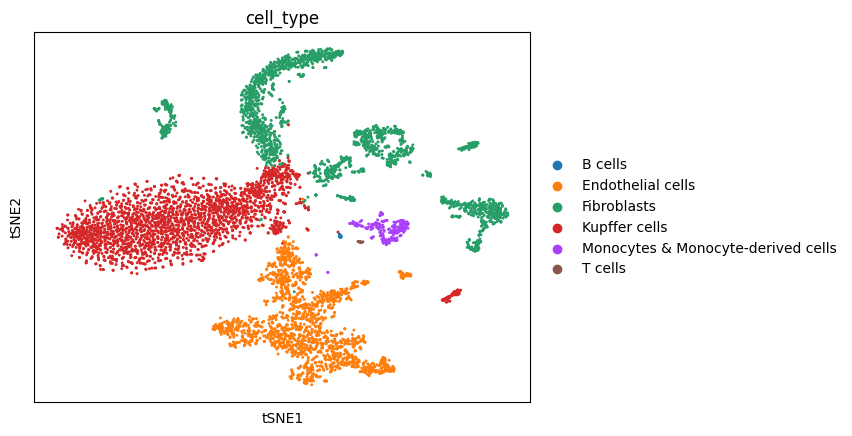

In [35]:
sc.pl.tsne(adata, color='cell_type') 

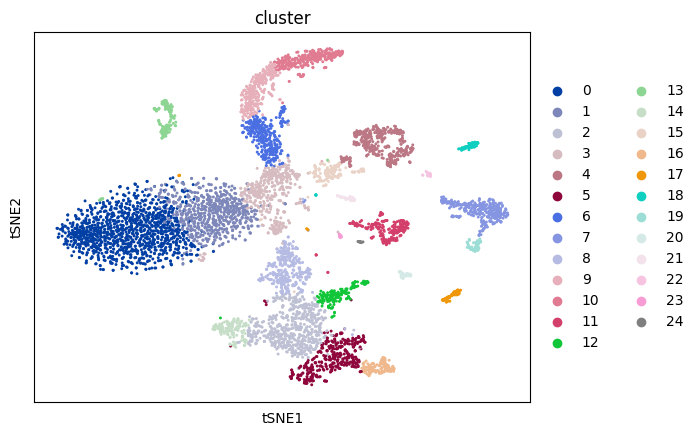

In [31]:
sc.pl.tsne(adata, color='cluster') 